# Instructions
This is the ipython notebook for creating visual interpretation of the results of the final experiment, which are stored in csv format.

# import necessary modules

In [1]:
import pandas as pd
import numpy as np
import csv
import tools as t
import matplotlib.pyplot as plt


# Loading necessary data, functions
You can optionally first run write to csv to ensure all available data is in the files. Then load the csv with appropriate paths.

## Data

In [2]:
# t.write_results_to_csv()
csv_path_NN = r"C:\Users\thebo\Desktop\resultsQRL\NN_experiment_data_v2.csv"
csv_path_PQC = r"C:\Users\thebo\Desktop\resultsQRL\PQC_experiment_data.csv"	
df_PQC = pd.read_csv(csv_path_PQC)
df_NN = pd.read_csv(csv_path_NN)
df_NN.loc[:,["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = df_NN[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].round(4)
df_PQC.loc[:,["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = df_PQC[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].round(4)
# print(df_PQC[df_PQC["n_holes"]==6])



print("There are {} NN models and {} PQC models".format(len(df_NN), len(df_PQC)))
print(df_NN.columns)


There are 2304 NN models and 1920 PQC models
Index(['environment', 'type', 'n_inputs', 'n_episodes', 'n_holes',
       'n_hidden_layers', 'n_nodes_per_layer', 'learning_rate', 'max_steps',
       'batch_size', 'number_of_parameters', 'n_reps', 'n_completed_runs',
       'best_performance', 'std_best_performance', 'mean_performance',
       'std_mean_performance', 'std_std_performance', 'best_policy',
       'best_policy_math_avg', 'n_achieved_best_policy'],
      dtype='object')


## Manually inputting optimal policies




In [3]:
columns = ["environment","n_holes","random","performance", "policy", "min_memory"]
data_optimal = [
    ['fiah', 5, 4.5705, 2.9309, "[1 1 3 3 1 1 3 3 1 1]", 2],
    ['fiah', 6, 5.1925, 3.3919, "[1 4 4 1 2 2 4 4 1 1]", 4],
    ['fiah', 7, 5.7157, 4.0017, "[1 5 2 1 5 4 1 5 3 1]", 3],
    ['fiah', 8, 6.1585, 4.4937, "[6 6 3 1 1 3 6 6 3 1]", 2],
    ['givens-gx0.79-gy1.57', 5, 4.5705, 2.8325, "[3 0 4 0 3 0 4 2 3 0]", 4],
    ['givens-gx0.79-gy1.57', 6, 5.1925, 3.3444, "[0 3 5 4 4 4 0 5 3 3]", 3],
    ['givens-gx0.79-gy1.57', 7, 5.7157, 3.4164, "[5 0 6 6 2 2 2 6 4 1]", 3],
    ['givens-gx0.79-gy1.57', 8, 6.1585, 3.7856, "[1 5 0 6 6 2 7 4 2 2]", 2],
    ['givens-gx3.14-gy1.57', 5, 4.5705, 3.0000, "[3 3 1 1 0 0 0 0 0 0]", 2],
    ['givens-gx3.14-gy1.57', 6, 5.1925, 3.5000, "[5 3 3 1 1 0 0 0 0 0]", 2],
    ['givens-gx3.14-gy1.57', 7, 5.7157, 4.0000, "[5 5 3 3 1 1 0 0 0 0]", 2],
    ['givens-gx3.14-gy1.57', 8, 6.1585, 4.5000, "[7 5 5 3 3 1 1 0 0 0]", 2],
    ['givens-gy0.79-gx0.79', 5, 4.5705, 2.6472, "[2 1 3 3 0 3 4 0 2 2]", 2],
    ['givens-gy0.79-gx0.79', 6, 5.1925, 2.8326, "[1 5 2 5 0 5 0 5 3 1]", 4],
    ['givens-gy0.79-gx0.79', 7, 5.7157, 3.4658, "[3 5 2 5 2 5 2 1 3 5]", 5],
    ['givens-gy0.79-gx0.79', 8, 6.1585, 3.5036, "[4 7 4 1 7 2 7 1 7 3]", 3]

]

df_optimal = pd.DataFrame(data = data_optimal, columns = columns )
# style = df_optimal.style


# hole_5= df_optimal[df_optimal["n_holes"]==5]
# hole_6= df_optimal[df_optimal["n_holes"]==6]
# hole_7= df_optimal[df_optimal["n_holes"]==7]
# hole_8= df_optimal[df_optimal["n_holes"]==8]

# data = [hole_5, hole_6, hole_7, hole_8]

# for d in data:
#     d= d.drop('n_holes', axis=1)
#     style = d.style
#     style.hide()
#     print(style.to_latex())



# Create normalized dataframes



In [6]:
def normalize(df_NN, df_PQC, df_optimal):
    df_NN_normed = df_NN.copy()
    df_PQC_normed = df_PQC.copy()
    envs = np.unique(df_PQC["environment"])
    for n in np.unique(df_PQC["n_holes"]):
        random = df_optimal[df_optimal["n_holes"]==n]["random"].values[0]
        for env in envs:

            optimal = df_optimal[(df_optimal["n_holes"]==n) & (df_optimal["environment"]==env)]["performance"].values[0]
            df_PQC_normed.loc[(df_PQC_normed["n_holes"]==n) & (df_PQC_normed["environment"]==env),["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = (df_PQC_normed[(df_PQC_normed["n_holes"]==n) & (df_PQC_normed["environment"]==env)][["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].values- optimal)/(random-optimal)
            df_NN_normed.loc[(df_NN_normed["n_holes"]==n) &(df_NN_normed["environment"]==env),["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = (df_NN_normed[(df_NN_normed["n_holes"]==n) & (df_NN_normed["environment"]==env)][["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].values- optimal)/(random-optimal)

    return df_NN_normed, df_PQC_normed

df_NN_normed, df_PQC_normed = normalize(df_NN, df_PQC, df_optimal)


## Load used functions

In [7]:
def select_data(df_NN, df_PQC, env_name = None, n_holes= None, lr = None, n_eps = None):
    data_NN = df_NN
    data_PQC = df_PQC

    if env_name is not None:
        data_NN = data_NN[data_NN["environment"]== env_name]
        data_PQC = data_PQC[data_PQC["environment"]== env_name]
    
    if n_holes is not None:
        data_NN = data_NN[data_NN["n_holes"]== n_holes]
        data_PQC = data_PQC[data_PQC["n_holes"]== n_holes]

    if lr is not None:
        data_NN = data_NN[data_NN["learning_rate"]==lr]
        data_PQC = data_PQC[data_PQC["learning_rate"]==lr]

    if n_eps is not None:
        data_NN = data_NN[data_NN["n_episodes"]==n_eps]
        data_PQC = data_PQC[data_PQC["n_episodes"]==n_eps]
    
    return data_NN, data_PQC



## Check dataframe for uneven entries

### NN

In [8]:
df_NN[df_NN["environment"] == "fiah"].head()
print(len(df_NN))
for lr in [0.1, 0.01, 0.001]:
    for n_eps in [2500, 11600, 53860, 250000]:
        mask = df_NN[(df_NN["learning_rate"]==lr)&(df_NN["n_episodes"]==n_eps)]
        print(f"for lr {lr} and {n_eps} eps, there are {len(mask)} models")
# print((df_NN))
# print(len(df_NN[df_NN["environment"]=='fiah']))
# print(len(df_NN[df_NN["environment"]=='givens-gx3.14-gy1.57']))
# print(len(df_NN[df_NN["environment"]=='givens-gx0.79-gy1.57']))
# missing = df_NN[df_NN["learning_rate"]==0.001][df_NN["n_episodes"]==2500]
# for env in np.unique(df_NN["environment"]):
#     for n_holes in [5,6,7,8]:
#         mask = missing[missing["environment"]==env][missing["n_holes"]==n_holes]
#         print(f"for env {env} and {n_holes} holes, there are {len(mask)} models")

# missing = missing[(missing["environment"]=="givens-gy0.79-gx0.79") & (missing["n_holes"]==6)]
# print(missing)

# missing: 1 hidden layer 3 nodes

2304
for lr 0.1 and 2500 eps, there are 192 models
for lr 0.1 and 11600 eps, there are 192 models
for lr 0.1 and 53860 eps, there are 192 models
for lr 0.1 and 250000 eps, there are 192 models
for lr 0.01 and 2500 eps, there are 192 models
for lr 0.01 and 11600 eps, there are 192 models
for lr 0.01 and 53860 eps, there are 192 models
for lr 0.01 and 250000 eps, there are 192 models
for lr 0.001 and 2500 eps, there are 192 models
for lr 0.001 and 11600 eps, there are 192 models
for lr 0.001 and 53860 eps, there are 192 models
for lr 0.001 and 250000 eps, there are 192 models


### PQC

In [9]:
df_PQC.head()
print(len(df_PQC["max_steps"]))
for lr in [0.1, 0.01, 0.001]:
    for n_eps in [2500, 11600, 53860, 250000]:
        mask = df_PQC[(df_PQC["learning_rate"]==lr)&(df_PQC["n_episodes"]==n_eps)]
        print(f"for lr {lr} and {n_eps} eps, there are {len(mask)} models")

# missing = df_PQC[df_PQC["learning_rate"]==0.001][df_PQC["n_episodes"]==2500][df_PQC["environment"]=='fiah'][df_PQC["n_holes"]==6]

# print(missing)

# missing: 9 layers

1920
for lr 0.1 and 2500 eps, there are 160 models
for lr 0.1 and 11600 eps, there are 160 models
for lr 0.1 and 53860 eps, there are 160 models
for lr 0.1 and 250000 eps, there are 160 models
for lr 0.01 and 2500 eps, there are 160 models
for lr 0.01 and 11600 eps, there are 160 models
for lr 0.01 and 53860 eps, there are 160 models
for lr 0.01 and 250000 eps, there are 160 models
for lr 0.001 and 2500 eps, there are 160 models
for lr 0.001 and 11600 eps, there are 160 models
for lr 0.001 and 53860 eps, there are 160 models
for lr 0.001 and 250000 eps, there are 160 models


### selection of accidental double runs

In [10]:
# mask = df_PQC[df_PQC["learning_rate"]==0.01][df_PQC["n_episodes"]==11600][df_PQC["environment"]=="fiah"][df_PQC["n_layers"]==5]
# print(mask)
# # a = np.random.choice([77,163])
# # print(a)
# # df_PQC.drop(index = a, inplace= True)


# Data Analysis

## Performance as function of amount of parameters

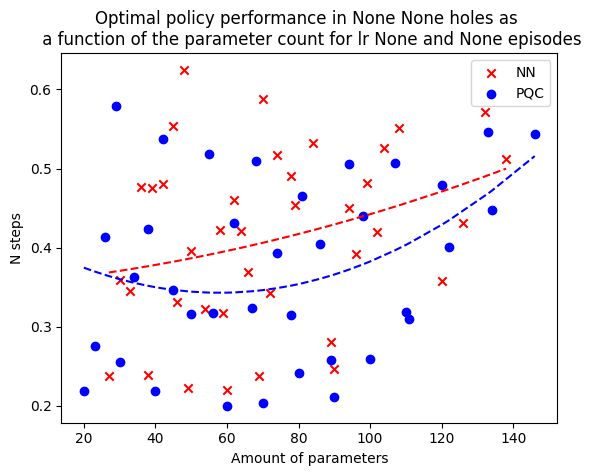

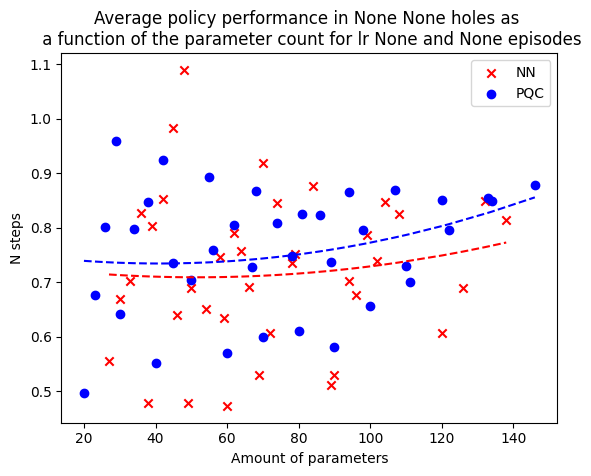

In [11]:
def plot_best_performance_and_mean_per_params(df_NN, df_PQC, env_name, n_holes, lr = None, n_eps = None, optimal_performance = None, plot_errors = False, fit_orders = None, titles = None):

    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)

    avg_best_performances_NN = []
    sem_best_performances_NN = []
    avg_mean_performances_NN = []
    sem_mean_performances_NN = []

    avg_best_performances_PQC = []
    sem_best_performances_PQC = []
    avg_mean_performances_PQC = []
    sem_mean_performances_PQC = []

    different_parameter_counts_NN = np.unique(data_NN["number_of_parameters"])
    different_parameter_counts_PQC = np.unique(data_PQC["number_of_parameters"])


    for n_params in different_parameter_counts_NN:
        data = data_NN[data_NN["number_of_parameters"]==n_params]
        length = len(data)
        if np.all(np.isnan(data["best_policy_math_avg"])):
            avg_best_performances_NN.append(np.NaN)
            sem_best_performances_NN.append(np.NaN)
            avg_mean_performances_NN.append(np.NaN)
            sem_mean_performances_NN.append(np.NaN)
        
        else:
            # print(data["best_policy_math_avg"])
            avg_best_performance = np.nanmean(data["best_policy_math_avg"])
            avg_best_performances_NN.append(avg_best_performance)

            avg_mean_performance = np.nanmean(data["mean_performance"])
            avg_mean_performances_NN.append(avg_mean_performance)

            if plot_errors:

                sem_best_performance = np.nanstd(data["best_policy_math_avg"])/np.sqrt(length)
                sem_best_performances_NN.append(sem_best_performance)
                
                # Here rectify error in saving the data
                # the aim is not to get the std for all the data
                # but to determine the standerd error of the mean
                # so here determine the total number of datapoints across which the std was calculated

                std_mean_performance = np.sqrt(np.sum(np.square(data["std_std_performance"])*(data["n_completed_runs"]/np.nansum(data["n_completed_runs"]))))/length
                sem_mean_performance = std_mean_performance/np.sqrt(1000*np.nansum(data["n_completed_runs"]))
                sem_mean_performances_NN.append(sem_mean_performance) 

    for n_params in different_parameter_counts_PQC:
        data = data_PQC[data_PQC["number_of_parameters"]==n_params]
        length = len(data)
        if np.all(np.isnan(data["best_policy_math_avg"])):
            avg_best_performances_PQC.append(np.NaN)
            sem_best_performances_PQC.append(np.NaN)
            avg_mean_performances_PQC.append(np.NaN)
            sem_mean_performances_PQC.append(np.NaN)
        else:
            avg_best_performance = np.nanmean(data["best_policy_math_avg"])
            avg_best_performances_PQC.append(avg_best_performance)

            avg_mean_performance = np.nanmean(data["mean_performance"])
            avg_mean_performances_PQC.append(avg_mean_performance)

            if plot_errors:
                sem_best_performance = np.nanstd(data["best_policy_math_avg"])/np.sqrt(length)
                sem_best_performances_PQC.append(sem_best_performance)
                
                # Here rectify error in saving the data
                # the aim is not to get the std for all the data
                # but to determine the standerd error of the mean
                # so here determine the total number of datapoints across which the std was calculated

                std_mean_performance = np.sqrt(np.sum(np.square(data["std_std_performance"])*(data["n_completed_runs"]/np.nansum(data["n_completed_runs"]))))/length
                sem_mean_performance = std_mean_performance/np.sqrt(1000*np.nansum(data["n_completed_runs"]))
                sem_mean_performances_PQC.append(sem_mean_performance)

    if fit_orders is not None:
        best_NN_fit = np.polyfit(different_parameter_counts_NN, avg_best_performances_NN, fit_orders[0])
        best_PQC_fit = np.polyfit(different_parameter_counts_PQC, avg_best_performances_PQC, fit_orders[1])

        average_NN_fit = np.polyfit(different_parameter_counts_NN, avg_mean_performances_NN, fit_orders[2])
        average_PQC_fit = np.polyfit(different_parameter_counts_PQC, avg_mean_performances_PQC, fit_orders[3])

    # BEST PERFORMANCE

    plt.scatter(different_parameter_counts_NN, avg_best_performances_NN, marker= "x", color = "r", label = "NN")
    plt.scatter(different_parameter_counts_PQC, avg_best_performances_PQC, marker= "o", color = "b", label = "PQC")


    if fit_orders is not None:
        plt.plot(different_parameter_counts_NN, np.polyval(best_NN_fit, different_parameter_counts_NN), linestyle = "dashed", color = "r")
        plt.plot(different_parameter_counts_PQC, np.polyval(best_PQC_fit, different_parameter_counts_PQC), linestyle = "dashed", color = "b")

    
    if plot_errors:
        plt.errorbar(different_parameter_counts_NN, avg_best_performances_NN, yerr = sem_best_performances_NN, linestyle = "None")
        plt.errorbar(different_parameter_counts_PQC, avg_best_performances_PQC, yerr= sem_best_performances_PQC, linestyle = "None")

    if optimal_performance is not None:
        plt.axhline(y = optimal_performance, linestyle = "dashed", color = 'g', label = "optimal")

    plt.xlabel("Amount of parameters")
    plt.ylabel("N steps")
    plt.title(f"Optimal policy performance in {env_name} {n_holes} holes as \n a function of the parameter count for lr {lr} and {n_eps} episodes")
    plt.legend()
    plt.show()

    # AVERAGE PERFORMANCE

    plt.scatter(different_parameter_counts_NN, avg_mean_performances_NN, marker= "x", color = "r", label = "NN")
    plt.scatter(different_parameter_counts_PQC, avg_mean_performances_PQC, marker= "o", color = "b", label = "PQC")

    if fit_orders is not None:
        plt.plot(different_parameter_counts_NN, np.polyval(average_NN_fit, different_parameter_counts_NN), linestyle = "dashed", color = "r")
        plt.plot(different_parameter_counts_PQC, np.polyval(average_PQC_fit, different_parameter_counts_PQC), linestyle = "dashed", color = "b")

    if plot_errors:

        plt.errorbar(different_parameter_counts_NN, avg_mean_performances_NN, yerr= sem_mean_performances_NN, linestyle = "None")
        plt.errorbar(different_parameter_counts_PQC, avg_mean_performances_PQC, yerr= sem_mean_performances_PQC, linestyle = "None")

    if optimal_performance is not None:
        plt.axhline(y = optimal_performance, linestyle = "dashed", color = 'g', label = "optimal")

    plt.xlabel("Amount of parameters")
    plt.ylabel("N steps")
    plt.title(f"Average policy performance in {env_name} {n_holes} holes as \n a function of the parameter count for lr {lr} and {n_eps} episodes")
    plt.legend()
    plt.show()

    pass

# eerste resultaten:

# set 1
env_name = None
lr = None
n_eps = None
n_holes = None


plot_best_performance_and_mean_per_params(df_NN_normed, df_PQC_normed, env_name, n_holes, lr, n_eps, optimal_performance= None, plot_errors= False, fit_orders = [2,2,2,2] )

## Performance distribution

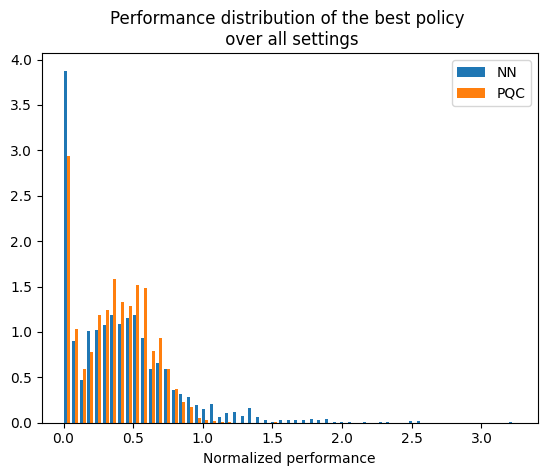

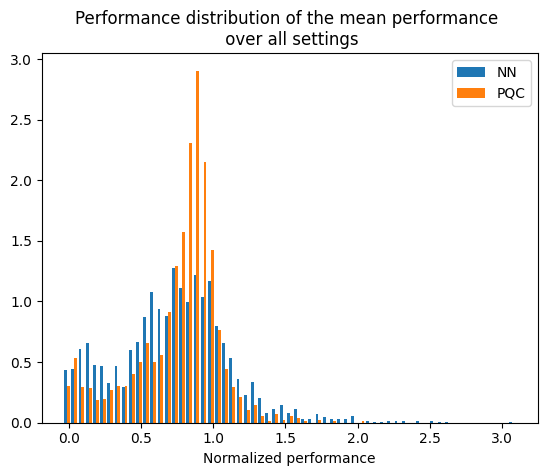

In [12]:
def performance_distribution(df_NN, df_PQC, env_name= None, n_holes= None, lr = None, n_eps = None, bins = 100, titles = None):

    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)

    best_policy_math_avg_NN = data_NN["best_policy_math_avg"]
    best_policy_math_avg_PQC = data_PQC["best_policy_math_avg"]
    
    plt.hist([best_policy_math_avg_NN, best_policy_math_avg_PQC], bins = bins, density= True, label= ["NN", "PQC"])
    if titles is not None:
        plt.title(titles[0])
    else:
        plt.title(f"Performance distribution of the best policy in {env_name} {n_holes} holes \n for lr {lr} and {n_eps} episodes")
    # if optimal_performance is not None:
    #     plt.xticks(list(range(10))+ [optimal_performance])
    plt.xlabel("Normalized performance")
    plt.legend()
    plt.show()

    mean_performances_NN = data_NN["mean_performance"]
    mean_performances_PQC = data_PQC["mean_performance"]

    # if optimal_performance is not None:
    #     plt.xticks([optimal_performance], ["optimal"])

    plt.hist([mean_performances_NN, mean_performances_PQC], bins = bins, density= True, label= ["NN", "PQC"])
    if titles is not None:
        plt.title(titles[1])
    else:

        plt.title(f"Performance distribution of the mean performance in {env_name} {n_holes} holes \n for lr {lr} and {n_eps} episodes")
    
    plt.xlabel("Normalized performance")
    plt.legend()
    plt.show()
    # avg_hist_NN = data_NN.hist(column = "mean_performance", bins= bins)
    # avg_hist_PQC = data_PQC.hist(column = "mean_performance", bins= bins)

    pass

env_name = None
n_holes = None
lr = None


performance_distribution(df_NN_normed, df_PQC_normed, env_name, n_holes, lr, n_eps, bins = "auto", titles = [ "Performance distribution of the best policy \n over all settings", "Performance distribution of the mean performance \n over all settings"])

# worse than random 


In [13]:
data_NN_worse_best = df_NN_normed[df_NN_normed["best_policy_math_avg"]>=1]
data_PQC_worse_best = df_PQC_normed[df_PQC_normed["best_policy_math_avg"]>=1]

data_NN_worse_mean = df_NN_normed[df_NN_normed["mean_performance"]>=1]
data_PQC_worse_mean = df_PQC_normed[df_PQC_normed["mean_performance"]>=1]


print(len(data_NN_worse_best))
print(len(data_PQC_worse_best))
print(len(data_NN_worse_mean))
print(len(data_PQC_worse_mean))

153
6
476
229


## Convergence ratio

In [14]:
def convergence_ratios(df_NN, df_PQC, env_name, n_holes, lr = None, n_eps = None, optimal_performance= None):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)
    n_entries_NN = len(data_NN)
    n_entries_PQC = len(data_PQC)

    converged_NNs = data_NN[data_NN["best_policy_math_avg"]==optimal_performance]
    converged_PQCs = data_PQC[data_PQC["best_policy_math_avg"]==optimal_performance]

    ratio_at_leat_1_converged_NN = len(converged_NNs)/n_entries_NN
    ratio_at_leat_1_converged_PQC = len(converged_PQCs)/n_entries_PQC

    # "n_achieved_best_policy" is out of 10, so for full ratio need to take this into account
    total_models_converged_NN = np.sum(converged_NNs["n_achieved_best_policy"])
    total_models_converged_PQC = np.sum(converged_PQCs["n_achieved_best_policy"])

    convergence_ratio_NNs = total_models_converged_NN/(n_entries_NN*10)
    convergence_ratio_PQCs = total_models_converged_PQC/(n_entries_PQC*10)

    print("The ratio of models where at least 1 of the runs achieved the optimal policy was:\n NNs: {}, PQCs: {}.".format(
        ratio_at_leat_1_converged_NN, ratio_at_leat_1_converged_PQC
    ))
    print("The total convergence ratios are:\n NNs: {}, PQCs: {}.".format(
        convergence_ratio_NNs, convergence_ratio_PQCs
    ))

    pass

env_name = 'fiah'
n_holes = 5
lr = 0.1
n_eps = 250000
optimal_performance = df_optimal[df_optimal["environment"]==env_name][df_optimal["n_holes"]==n_holes]["performance"].values[0]

convergence_ratios(df_NN, df_PQC, env_name, n_holes, lr, n_eps, df_optimal[df_optimal["environment"]==env_name][df_optimal["n_holes"]==n_holes]["performance"].values[0])


The ratio of models where at least 1 of the runs achieved the optimal policy was:
 NNs: 0.0, PQCs: 1.0.
The total convergence ratios are:
 NNs: 0.0, PQCs: 0.49.


C:\Users\thebo\AppData\Local\Temp\ipykernel_10396\2016267675.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  optimal_performance = df_optimal[df_optimal["environment"]==env_name][df_optimal["n_holes"]==n_holes]["performance"].values[0]
C:\Users\thebo\AppData\Local\Temp\ipykernel_10396\2016267675.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  convergence_ratios(df_NN, df_PQC, env_name, n_holes, lr, n_eps, df_optimal[df_optimal["environment"]==env_name][df_optimal["n_holes"]==n_holes]["performance"].values[0])


## Training instability
Analysing the ratio of runs that return nans


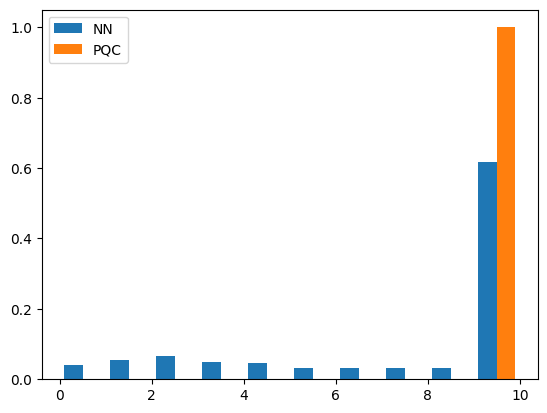

The ratio of completed runs for None and None holes with lr None neps None was: 
 NN: 0.7453993055555556, PQC: 1.0.


In [15]:
def completed_runs(df_NN, df_PQC, env_name=None, n_holes=None, lr = None, n_eps = None, bins = 100, plot_hist= True, title = None):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)

    n_completed_runs_NN = data_NN["n_completed_runs"].fillna(0)
    n_completed_runs_PQC  = data_PQC["n_completed_runs"].fillna(0)

    

    if plot_hist:
        plt.hist([n_completed_runs_NN, n_completed_runs_PQC], bins = bins, density= True, label= ["NN", "PQC"])
        # plt.hist(n_completed_runs_NN, bins = bins, density= True, label= "NN")
        # plt.hist(n_completed_runs_PQC, bins = bins, density= True, label= "PQC")
        if title is not None:
            plt.title(title)
        else:
            plt.title(f"Distribution for the amount of completed runs in {env_name} {n_holes} holes \n for lr {lr} and {n_eps} episodes")
        plt.legend()
        plt.show()
    
    
    print("The ratio of completed runs for {} and {} holes with lr {} neps {} was: \n NN: {}, PQC: {}.".format(
        env_name, n_holes, lr, n_eps, (np.sum(n_completed_runs_NN)/(len(n_completed_runs_NN)*10)), 
        (np.sum(n_completed_runs_PQC)/(len(n_completed_runs_PQC)*10))
    ))

env_name = None
n_holes = None
lr = None
n_eps = None
completed_runs(df_NN, df_PQC, env_name, n_holes, lr, n_eps, bins =10, title = "")

## Create table from results


In [16]:
def write_bests_to_table(df_NN, df_PQC, df_optimal, env_name=None, n_holes=None, print_latex = False):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes)

    #all_data = pd.concat([data_NN, data_PQC], ignore_index= True, sort= False)

    env_names = np.unique(data_NN["environment"])
    hole_nrs = np.unique(data_NN["n_holes"])


    table_data = []

    for env in env_names:
        for hole_nr in hole_nrs:
            row = [env, hole_nr]

            ## PQC
            relevant_data = data_PQC[data_PQC["environment"]==env][data_PQC["n_holes"]==hole_nr]
            best_performance = np.nanmin(relevant_data['best_policy_math_avg'])
            relevant_data = relevant_data[relevant_data["best_policy_math_avg"]==best_performance]
            min_params = np.min(relevant_data['number_of_parameters'])
            relevant_data = relevant_data[relevant_data['number_of_parameters']==min_params]
            min_eps = np.min(relevant_data['n_episodes'])
            relevant_data = relevant_data[relevant_data['n_episodes']==min_eps]
            # print(relevant_data)
            min_lr_arg = np.argmin(relevant_data['learning_rate'])
            # print(min_lr_arg)
            relevant_data = relevant_data.iloc[min_lr_arg]
            min_lr = relevant_data['learning_rate']
            policy = relevant_data['best_policy']
            row_PQC = [min_params, min_eps, min_lr, best_performance, policy]
            row.extend(row_PQC)

            #NN
            relevant_data = data_NN[data_NN["environment"]==env][data_NN["n_holes"]==hole_nr]
            best_performance = np.nanmin(relevant_data['best_policy_math_avg'])
            relevant_data = relevant_data[relevant_data["best_policy_math_avg"]==best_performance]
            min_params = np.min(relevant_data['number_of_parameters'])
            relevant_data = relevant_data[relevant_data['number_of_parameters']==min_params]
            min_eps = np.min(relevant_data['n_episodes'])
            relevant_data = relevant_data[relevant_data['n_episodes']==min_eps]
            # print(relevant_data)
            min_lr_arg = np.argmin(relevant_data['learning_rate'])
            # print(min_lr_arg)
            relevant_data = relevant_data.iloc[min_lr_arg]
            min_lr = relevant_data['learning_rate']
            policy = relevant_data['best_policy']
            row_NN = [min_params, min_eps, min_lr, best_performance, policy]
            row.extend(row_NN)
            optimal = df_optimal[df_optimal["environment"]==env][df_optimal["n_holes"]==hole_nr]
            row.extend([optimal["performance"].to_numpy()[0], optimal["policy"].to_numpy()[0]])

            table_data.append(row)

    
    results= pd.DataFrame(data = table_data, columns = ['environment', 'n holes', 'n parameters PQC', 'n episodes PQC', 'learning rate PQC', 'performance PQC', 'policy PQC', 'n parameters NN', 'n episodes NN', 'learning rate NN', 'performance NN', 'policy NN', "optimal performance", "optimal policy"] )
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(results)

    if print_latex:
        style = results.style
        style.hide()
        print(style.to_latex())
    
    return results

def write_specific_to_table(df_NN, df_PQC, env_name=None, n_holes=None, lr = None, n_episodes = None, print_latex = False):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes)

    all_data = pd.concat([data_NN, data_PQC], ignore_index= True, sort= False)

    env_names = np.unique(data_NN["environment"])
    hole_nrs = np.unique(data_NN["n_holes"])


    table_data = []

    for env in env_names:
        for hole_nr in hole_nrs:

            relevant_data = all_data[all_data["environment"]==env][all_data["n_holes"]==hole_nr]
            best_performance = np.nanmin(relevant_data['best_policy_math_avg'])
            relevant_data = relevant_data[relevant_data["best_policy_math_avg"]==best_performance]
            min_params = np.min(relevant_data['number_of_parameters'])
            relevant_data = relevant_data[relevant_data['number_of_parameters']==min_params]
            min_eps = np.min(relevant_data['n_episodes'])
            relevant_data = relevant_data[relevant_data['n_episodes']==min_eps]
            # print(relevant_data)
            min_lr_arg = np.argmin(relevant_data['learning_rate'])
            # print(min_lr_arg)
            relevant_data = relevant_data.iloc[min_lr_arg]
            min_lr = relevant_data['learning_rate']
            type = relevant_data['type']
            policy = np.array(relevant_data['best_policy'])
            row = [env, hole_nr, type, min_params, min_eps, min_lr, best_performance, policy]
            table_data.append(row)

    
    results= pd.DataFrame(data = table_data, columns = ['environment', 'n holes', 'type', 'n parameters', 'n episodes', 'learning rate', 'performance', 'policy'])
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(results)
    
    if print_latex:
        results.style.to_latex()

    pass

table = write_bests_to_table(df_NN, df_PQC, df_optimal, print_latex= False)
table_NN = table[['environment','n holes','n parameters NN', 'n episodes NN', 'learning rate NN', 'performance NN', 'policy NN']]
for n in [5,6,7,8]:
    print(n)
    print(table_NN[table_NN["n holes"]==n])
    print( "break")

             environment  n holes  n parameters PQC  n episodes PQC  \
0                   fiah        5                20            2500   
1                   fiah        6                67          250000   
2                   fiah        7                38           53860   
3                   fiah        8               107          250000   
4   givens-gx0.79-gy1.57        5                40          250000   
5   givens-gx0.79-gy1.57        6                78            2500   
6   givens-gx0.79-gy1.57        7                26            2500   
7   givens-gx0.79-gy1.57        8                29          250000   
8   givens-gx3.14-gy1.57        5                20            2500   
9   givens-gx3.14-gy1.57        6                23            2500   
10  givens-gx3.14-gy1.57        7                26           11600   
11  givens-gx3.14-gy1.57        8                55          250000   
12  givens-gy0.79-gx0.79        5                50           11600   
13  gi

C:\Users\thebo\AppData\Local\Temp\ipykernel_10396\2913315791.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relevant_data = data_PQC[data_PQC["environment"]==env][data_PQC["n_holes"]==hole_nr]
C:\Users\thebo\AppData\Local\Temp\ipykernel_10396\2913315791.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relevant_data = data_NN[data_NN["environment"]==env][data_NN["n_holes"]==hole_nr]
C:\Users\thebo\AppData\Local\Temp\ipykernel_10396\2913315791.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  optimal = df_optimal[df_optimal["environment"]==env][df_optimal["n_holes"]==hole_nr]
C:\Users\thebo\AppData\Local\Temp\ipykernel_10396\2913315791.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relevant_data = data_PQC[data_PQC["environment"]==env][data_PQC["n_holes"]==hole_nr]
C:\Users\thebo\AppData\Local\Temp\ipykernel_10396\2913315791.py:34: UserWarning

In [17]:
def performance_per_hyperparameter(df_NN, df_PQC, hyperparameter, alpha = 0.2 ,bins_width = 0.1, title = None, best_or_mean = "best"):
    parameter_array = np.unique(df_NN[hyperparameter])

    # df_NN, df_PQC = select_data(df_NN, df_PQC, env_name= 'givens-gx0.79-gy1.57', n_holes = 5)

    fig_NN, axis_NN = plt.subplots()
    fig_PQC, axis_PQC = plt.subplots()

    for value in parameter_array:
        data_NN = df_NN[df_NN[hyperparameter]==value]
        data_PQC = df_PQC[df_PQC[hyperparameter]==value]

        if best_or_mean == "best":
            data_NN = data_NN["best_policy_math_avg"]
            data_PQC = data_PQC["best_policy_math_avg"]
        
        else:
            data_NN = data_NN["mean_performance"]
            data_PQC = data_PQC["mean_performance"]

        max_x = max(np.nanmax(data_NN), np.nanmax(data_PQC))
        bins = np.arange(0, max_x, bins_width)
        
        axis_NN.hist(data_NN, bins = bins, density= True, alpha = alpha, label= (hyperparameter+ " = " + str(value)))
        axis_PQC.hist(data_PQC, bins = bins, density= True, alpha= alpha, label= (hyperparameter+ " = " + str(value)))

    

    if title is not None:
        axis_NN.set_title(title+ " NN")
        axis_PQC.set_title(title+ " PQC")
    else:
        axis_NN.set_title(f"Performance distribution for different {hyperparameter} values for NN")
        axis_PQC.set_title(f"Performance distribution for different {hyperparameter} values for PQC")
   
    axis_NN.legend()
    axis_PQC.legend()

    lims_NN_x = axis_NN.get_xlim()
    lims_PQC_x = axis_PQC.get_xlim()

    max_xlim = max(lims_NN_x[1], lims_PQC_x[1])

    axis_NN.set_xlim(0, max_xlim)
    axis_PQC.set_xlim(0, max_xlim)

    lims_NN_y = axis_NN.get_ylim()
    lims_PQC_y = axis_PQC.get_ylim()

    max_ylim = max(lims_NN_y[1], lims_PQC_y[1])

    axis_NN.set_ylim(0, max_ylim)
    axis_PQC.set_ylim(0, max_ylim)


    fig_NN.show()
    fig_PQC.show()

C:\Users\thebo\AppData\Local\Temp\ipykernel_10396\1602415886.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_NN.show()
C:\Users\thebo\AppData\Local\Temp\ipykernel_10396\1602415886.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_PQC.show()


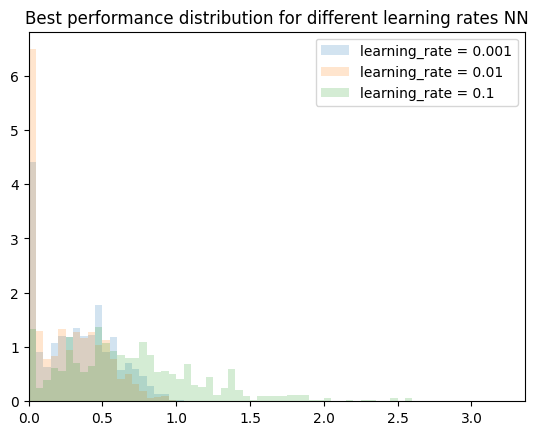

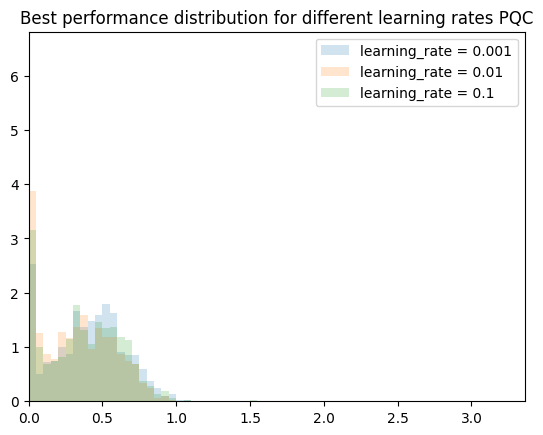

In [18]:
performance_per_hyperparameter(df_NN_normed, df_PQC_normed, "learning_rate", alpha = 0.2, bins_width = 0.05, title = "Best performance distribution for different learning rates", best_or_mean = "best")

# Variance through lr


In [19]:
def variance_trough_lr(df_NN_normed, df_PQC_normed, best_or_mean = "best", print_latex= False):
    columns = ["n episodes", "PQC lr 0.001", "PQC lr 0.01", "PQC lr 0.1","PQC std ", "NN lr 0.001","NN lr 0.01", "NN lr 0.1", "NN std"]
    table_data = []
    if best_or_mean == "best":
        performance_column = "best_policy_math_avg"
    elif best_or_mean == "mean":
        performance_column = "mean_performance"

    for n_eps in np.unique(df_NN["n_episodes"]):
        data_NN, data_PQC = select_data(df_NN_normed, df_PQC_normed, n_eps = n_eps)
        
        perf_NN_e_3 = np.mean(data_NN[data_NN["learning_rate"]==0.001][performance_column])
        perf_NN_e_2 = np.mean(data_NN[data_NN["learning_rate"]==0.010][performance_column])
        perf_NN_e_1 = np.mean(data_NN[data_NN["learning_rate"]==0.100][performance_column])
        NN_std = np.std([perf_NN_e_3, perf_NN_e_2, perf_NN_e_1])

        perf_PQC_e_3 = np.mean(data_PQC[data_PQC["learning_rate"]==0.001][performance_column])
        perf_PQC_e_2 = np.mean(data_PQC[data_PQC["learning_rate"]==0.010][performance_column])
        perf_PQC_e_1 = np.mean(data_PQC[data_PQC["learning_rate"]==0.100][performance_column])
        PQC_std = np.std([perf_PQC_e_3, perf_PQC_e_2, perf_PQC_e_1])


        table_data.append([n_eps, perf_PQC_e_3, perf_PQC_e_2, perf_PQC_e_1, PQC_std, perf_NN_e_3, perf_NN_e_2, perf_NN_e_1, NN_std])

    results = pd.DataFrame(data = table_data, columns = columns)
    results = results.round(4)

    if print_latex:

        style = results.style
        style.hide()
        print(style.to_latex())

    return results

    



In [20]:
variance_trough_lr(df_NN_normed, df_PQC_normed, "best", print_latex = True)

\begin{tabular}{rrrrrrrrr}
n episodes & PQC lr 0.001 & PQC lr 0.01 & PQC lr 0.1 & PQC std  & NN lr 0.001 & NN lr 0.01 & NN lr 0.1 & NN std \\
2500 & 0.461900 & 0.455000 & 0.469200 & 0.005800 & 0.490600 & 0.389100 & 0.599000 & 0.085700 \\
11600 & 0.438700 & 0.385700 & 0.413200 & 0.021600 & 0.388600 & 0.245000 & 0.646800 & 0.166200 \\
53860 & 0.395800 & 0.290500 & 0.328800 & 0.043500 & 0.272500 & 0.189700 & 0.763900 & 0.253400 \\
250000 & 0.323200 & 0.192100 & 0.283600 & 0.054900 & 0.169600 & 0.188300 & 0.808200 & 0.296700 \\
\end{tabular}



,n episodes,PQC lr 0.001,PQC lr 0.01,PQC lr 0.1,PQC std,NN lr 0.001,NN lr 0.01,NN lr 0.1,NN std
0,2500,0.4619,0.4550,0.4692,0.0058,0.4906,0.3891,0.5990,0.0857
1,11600,0.4387,0.3857,0.4132,0.0216,0.3886,0.2450,0.6468,0.1662
2,53860,0.3958,0.2905,0.3288,0.0435,0.2725,0.1897,0.7639,0.2534
3,250000,0.3232,0.1921,0.2836,0.0549,0.1696,0.1883,0.8082,0.2967


# complexity    

In [48]:
def plot_best_performance_and_mean_per_holes(df_NN, df_PQC, env_name= None, lr = None, n_eps = None, plot_errors = False, fit_orders = None, titles = None):

    df_NN, df_PQC = select_data(df_NN, df_PQC, env_name,  None, lr, n_eps)

    avg_best_performances_NN = []
    sem_best_performances_NN = []
    avg_mean_performances_NN = []
    sem_mean_performances_NN = []

    avg_best_performances_PQC = []
    sem_best_performances_PQC = []
    avg_mean_performances_PQC = []
    sem_mean_performances_PQC = []

    holes_axis = np.unique(df_NN["n_holes"])

    for hole_nr in holes_axis:
        data_NN = df_NN[df_NN["n_holes"]==hole_nr]
        data_PQC = df_PQC[df_PQC["n_holes"]==hole_nr]

        length_NN = len(data_NN)
        length_PQC = len(data_PQC)

        # print(data["best_policy_math_avg"])
        avg_best_performance_NN = np.nanmean(data_NN["best_policy_math_avg"])
        avg_best_performances_NN.append(avg_best_performance_NN)
        avg_best_performance_PQC = np.nanmean(data_PQC["best_policy_math_avg"])
        avg_best_performances_PQC.append(avg_best_performance_PQC)

        avg_mean_performance_NN = np.nanmean(data_NN["mean_performance"])
        avg_mean_performances_NN.append(avg_mean_performance_NN)
        avg_mean_performance_PQC = np.nanmean(data_PQC["mean_performance"])
        avg_mean_performances_PQC.append(avg_mean_performance_PQC)

        if plot_errors:

            sem_best_performance_NN = np.nanstd(data_NN["best_policy_math_avg"])/np.sqrt(length_NN)
            sem_best_performances_NN.append(sem_best_performance_NN)
            sem_best_performance_PQC = np.nanstd(data_PQC["best_policy_math_avg"])/np.sqrt(length_PQC)
            sem_best_performances_PQC.append(sem_best_performance_PQC)
            
            # Here rectify error in saving the data
            # the aim is not to get the std for all the data
            # but to determine the standerd error of the mean
            # so here determine the total number of datapoints across which the std was calculated

            std_mean_performance_NN = np.sqrt(np.sum(np.square(data_NN["std_std_performance"])*(data_NN["n_completed_runs"]/np.nansum(data_NN["n_completed_runs"]))))/length_NN
            sem_mean_performance_NN = std_mean_performance_NN/np.sqrt(1000*np.nansum(data["n_completed_runs"]))
            sem_mean_performances_NN.append(sem_mean_performance_NN) 

            std_mean_performance_PQC = np.sqrt(np.sum(np.square(data_PQC["std_std_performance"])*(data_PQC["n_completed_runs"]/np.nansum(data_PQC["n_completed_runs"]))))/length_PQC
            sem_mean_performance_PQC = std_mean_performance_PQC/np.sqrt(1000*np.nansum(data["n_completed_runs"]))
            sem_mean_performances_PQC.append(sem_mean_performance_PQC)

    
    if fit_orders is not None:
        best_NN_fit = np.polyfit(holes_axis, avg_best_performances_NN, fit_orders[0])
        best_PQC_fit = np.polyfit(holes_axis, avg_best_performances_PQC, fit_orders[1])

        average_NN_fit = np.polyfit(holes_axis, avg_mean_performances_NN, fit_orders[2])
        average_PQC_fit = np.polyfit(holes_axis, avg_mean_performances_PQC, fit_orders[3])

    # BEST PERFORMANCE

    plt.scatter(holes_axis, avg_best_performances_NN, marker= "x", color = "r", label = "NN")
    plt.scatter(holes_axis, avg_best_performances_PQC, marker= "o", color = "b", label = "PQC")


    if fit_orders is not None:
        plt.plot(holes_axis, np.polyval(best_NN_fit, holes_axis), linestyle = "dashed", color = "r", label = "NN fit: y= {}*x +{}".format(best_NN_fit[0].round(3), best_NN_fit[1].round(3)))
        plt.plot(holes_axis, np.polyval(best_PQC_fit, holes_axis), linestyle = "dashed", color = "b", label = "PQC fit: y= {}*x +{}".format(best_PQC_fit[0].round(3), best_PQC_fit[1].round(3)))

    
    if plot_errors:
        plt.errorbar(holes_axis, avg_best_performances_NN, yerr = sem_best_performances_NN, linestyle = "None")
        plt.errorbar(holes_axis, avg_best_performances_PQC, yerr= sem_best_performances_PQC, linestyle = "None")

    plt.xlabel("N holes")
    plt.ylabel("Performance")
    plt.title(f"Optimal policy performance as a function of the amount of holes")
    plt.legend()
    plt.show()

    # AVERAGE PERFORMANCE

    plt.scatter(holes_axis, avg_mean_performances_NN, marker= "x", color = "r", label = "NN")
    plt.scatter(holes_axis, avg_mean_performances_PQC, marker= "o", color = "b", label = "PQC")

    if fit_orders is not None:
        plt.plot(holes_axis, np.polyval(average_NN_fit, holes_axis), linestyle = "dashed", color = "r", label = "NN fit: y= {}*x +{}".format(average_NN_fit[0].round(3), average_NN_fit[1].round(3)))
        plt.plot(holes_axis, np.polyval(average_PQC_fit, holes_axis), linestyle = "dashed", color = "b", label = "PQC fit: y= {}*x +{}".format(average_PQC_fit[0].round(3), average_PQC_fit[1].round(3)))

    if plot_errors:

        plt.errorbar(holes_axis, avg_mean_performances_NN, yerr= sem_mean_performances_NN, linestyle = "None")
        plt.errorbar(holes_axis, avg_mean_performances_PQC, yerr= sem_mean_performances_PQC, linestyle = "None")


    plt.xlabel("N holes")
    plt.ylabel("Performance")
    plt.title(f"Mean policy performance as a function of the amount of holes")
    plt.legend()
    plt.show()

    pass

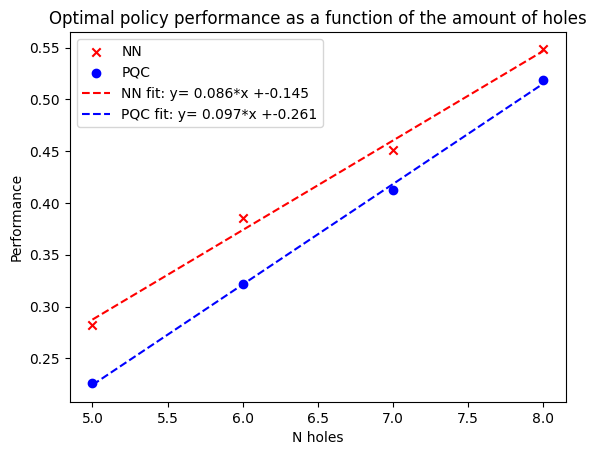

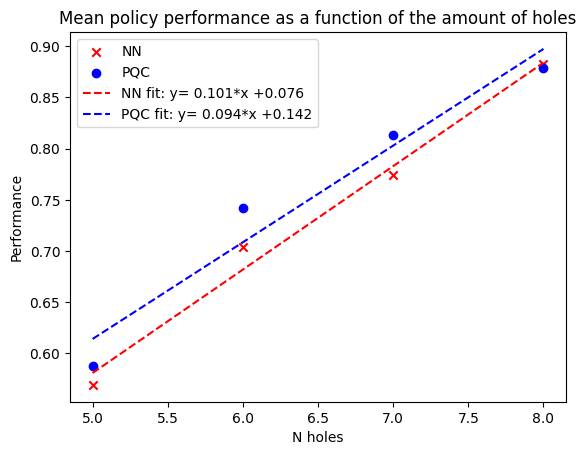

In [49]:
plot_best_performance_and_mean_per_holes(df_NN_normed, df_PQC_normed, plot_errors= False, fit_orders = [1,1,1,1] )

In [50]:
for holes in np.unique(df_NN["n_holes"]):
    avg_param_count_NN = np.mean(df_NN[df_NN["n_holes"]==holes]["number_of_parameters"])
    avg_param_count_PQC = np.mean(df_PQC[df_PQC["n_holes"]==holes]["number_of_parameters"])

    print(f"for {holes} holes, the average parameter count was: NN: {avg_param_count_NN}, PQC: {avg_param_count_PQC}")


for 5 holes, the average parameter count was: NN: 60.5, PQC: 65.0
for 6 holes, the average parameter count was: NN: 65.0, PQC: 72.5
for 7 holes, the average parameter count was: NN: 69.5, PQC: 80.0
for 8 holes, the average parameter count was: NN: 74.0, PQC: 87.5
